In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
df_item_cate = pd.read_csv("./csv/관광여행_시_구매한_여행사_상품_유형__중복응답.csv")
df_reservation_cate = pd.read_csv("./csv/관광여행_사전예약_유형__중복응답.csv")

In [4]:
df_reservation_cate.loc[(df_reservation_cate.query("항목 == '체험 프로그램(농어촌 체험 생태체험 학습 등)'").index),'항목'] = '체험 프로그램'
df_reservation_cate.loc[(df_reservation_cate.query("항목 == '관광명소(유적지 국립공원 등)'").index),'항목'] = '관광명소'
df_reservation_cate.loc[(df_reservation_cate.query("항목 == '교통수단(항공 선박 철도 버스 등)'").index),'항목'] = '교통수단'
df_reservation_cate.loc[(df_reservation_cate.query("항목 == '레저시설(놀이시설 스파 스키장 골프장 등)'").index),'항목'] = '레저시설'
df_reservation_cate.loc[(df_reservation_cate.query("항목 == '숙박시설(호텔 콘도미니엄/ 리조트 펜션 유스호스텔 등)'").index),'항목'] = '숙박시설'
df_item_cate.loc[(df_item_cate.query("항목 == '교통(항공 선박 철도 버스 등)'").index),'항목'] = '교통'

## 관광여행_시_구매한_여행사_상품_유형

In [5]:
df_item_cate

,시점,통계분류(1),통계분류(2),항목,데이터
0,2018,성별,남자,숙박시설,57.5
1,2018,성별,남자,교통,40.2
2,2018,성별,남자,차량대여/렌트,31.8
3,2018,성별,남자,레저시설,17.5
4,2018,성별,남자,기타,5.9
...,...,...,...,...,...
177,2022,연령,60대,레저시설,17.4
178,2022,연령,70세 이상,숙박시설,40.1
179,2022,연령,70세 이상,교통,31.4
180,2022,연령,70세 이상,차량대여/렌트,28.5


In [6]:
item_cate = df_item_cate.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
교통,35.65,29.9,33.50,31.7,50.3,61.50,71.00
기타,17.30,1.7,7.15,2.1,2.0,7.00,NaN
레저시설,44.75,27.4,14.50,11.0,7.1,15.65,18.05
숙박시설,64.70,82.3,76.90,85.7,85.8,64.70,41.40
차량대여/렌트,30.00,19.0,13.10,21.5,25.1,31.40,28.50


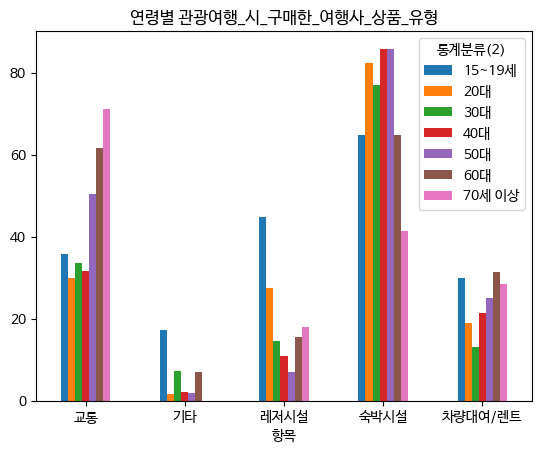

In [7]:
result.plot(kind='bar')
plt.title("연령별 관광여행_시_구매한_여행사_상품_유형")
plt.xticks(rotation=0)
plt.show()

- 30대, 40대 모두 숙박시설을 가장 많이 구매함.
- 숙박시설 -> 교통 -> 차량대여/렌트 -> 레저시설 -> 기타
- 차량대여/렌트의 경우 30대보다 40대가 많이 구매함.
- 레저시설은 30대가 더많음

In [8]:
item_cate = df_item_cate.query("`통계분류(1)` == '성별'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
교통,40.20,38.4
기타,3.65,2.5
레저시설,16.50,10.8
숙박시설,79.60,81.8
차량대여/렌트,21.60,22.1


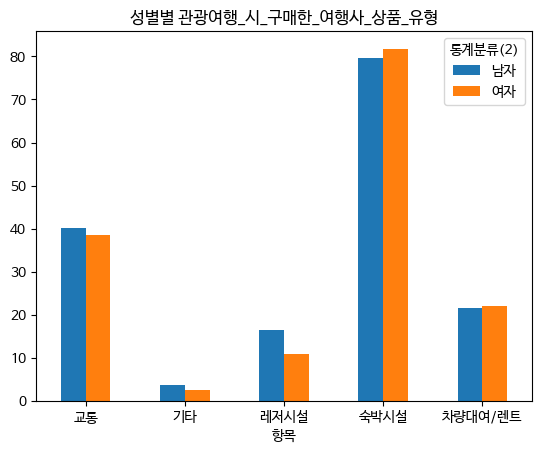

In [9]:
result.plot(kind='bar')
plt.title("성별별 관광여행_시_구매한_여행사_상품_유형")
plt.xticks(rotation=0)
plt.show()

- 여성이 남성보다 교통, 차량대여, 숙박시설 부분에서 더 많이 구매함
- 숙박시설 -> 교통 -> 차량대여/렌트 -> 레저시설 -> 기타

Text(0.5, 1.0, '연도별 관광여행_시_구매한_여행사_상품_유형')

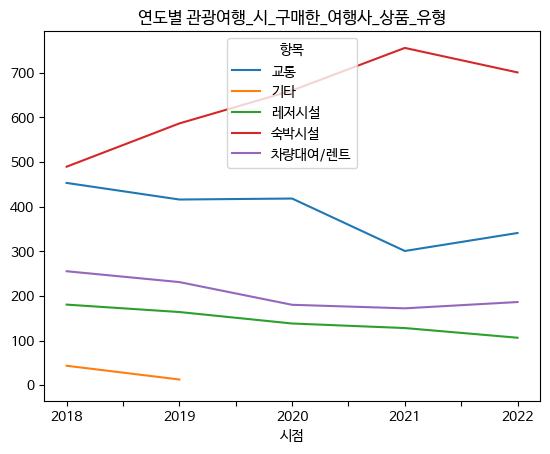

In [10]:
df_item_cate['시점'] = df_item_cate['시점'].astype(str)
grouped = df_item_cate.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result.plot(kind='line')
plt.title("연도별 관광여행_시_구매한_여행사_상품_유형")

- 시간이 지날수록 레저시설과 차량대여, 교통의 구매량이 줄어든다
- 숙박시설의 경우 21년까지 늘어나다가 22년에 줄어듬

## 관광여행_사전예약_유형__중복응답

In [20]:
df_reservation_cate

,시점,통계분류(1),통계분류(2),항목,데이터
0,2018,성별,남자,숙박시설,79.4
1,2018,성별,남자,교통수단,23.3
2,2018,성별,남자,차량대여/렌트,19.9
3,2018,성별,남자,레저시설,8.1
4,2018,성별,남자,식당,7.4
...,...,...,...,...,...
377,2022,연령,70세 이상,레저시설,0.2
378,2022,연령,70세 이상,식당,1.9
379,2022,연령,70세 이상,관광명소,0.8
380,2022,연령,70세 이상,체험 프로그램,0.0


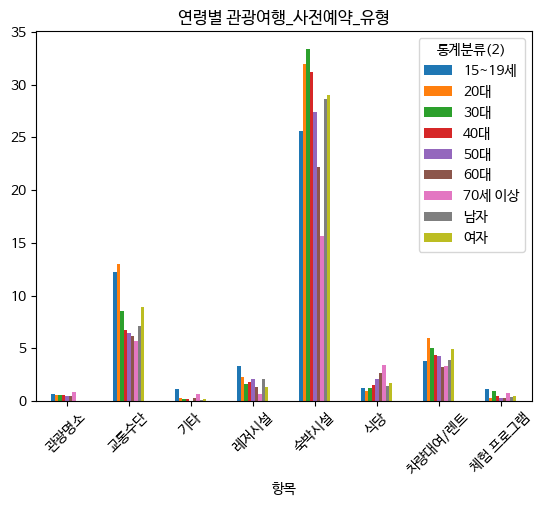

In [12]:
item_cate = df_reservation_cate.query("`통계분류(1)` == '연령' and 항목 == '관광명소' or 항목 == '교통수단' or 항목 == '기타' or 항목 == '레저시설' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램' or 항목 == '숙박시설'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()

result.plot(kind='bar')
plt.title("연령별 관광여행_사전예약_유형")
plt.xticks(rotation=45)
plt.show()

In [13]:
item_cate = df_reservation_cate.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
관광명소,0.7,0.6,0.6,0.6,0.5,0.5,0.80
교통수단,12.2,13.0,8.5,6.7,6.4,6.2,5.70
기타,1.1,0.3,0.2,0.2,0.0,0.3,0.70
레저시설,3.3,2.3,1.6,1.8,2.1,1.3,0.70
사전 예약하지 않았음,70.0,62.2,65.9,69.5,72.8,76.1,83.90
숙박시설,25.6,32.0,33.4,31.2,27.4,22.2,15.60
식당,1.2,0.9,1.2,1.5,2.1,2.6,3.40
차량대여/렌트,3.8,6.0,5.0,4.4,4.3,3.2,3.30
체험 프로그램,1.1,0.3,0.9,0.5,0.3,0.3,0.75


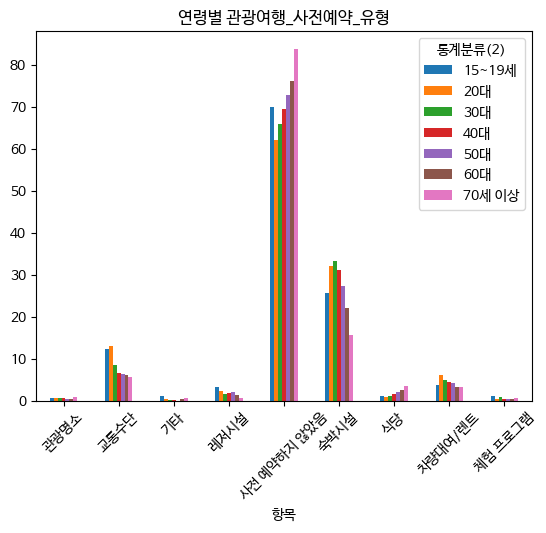

In [14]:
result.plot(kind='bar')
plt.title("연령별 관광여행_사전예약_유형")
plt.xticks(rotation=45)
plt.show()

- 숙박시설 > 사전예약x > 교통수단 > 차량대여 > 레저시설=식당 > 관광명소 > 체험프로그램 > 기타
- 숙박시설의 경우 30대가 가장 많음
- 70대는 사전예약하지 않은 경우가 가장 많음
- 교통수단의 경우 10대 20대가 가장 많고 40대가 가장 적음 -> 자가용이 있어서?

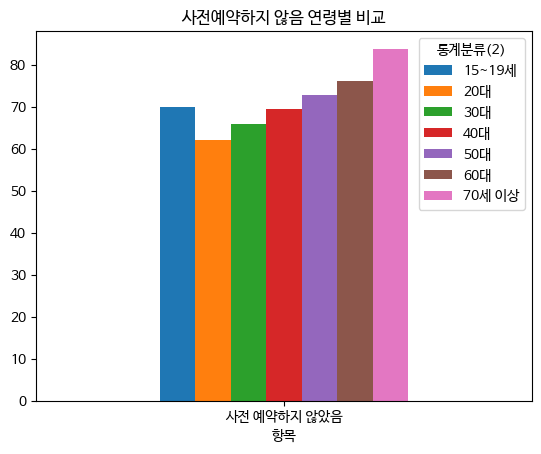

In [15]:
no_reservation = df_reservation_cate.query("항목 == '사전 예약하지 않았음' and `통계분류(1)` == '연령'")

grouped = no_reservation.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result.plot(kind='bar')
plt.title("사전예약하지 않음 연령별 비교")
plt.xticks(rotation=0)
plt.show()

In [44]:
item_cate = df_reservation_cate.query("`통계분류(2)` == '여자'")
item_cate = item_cate.query("항목 == '관광명소' or 항목 == '교통수단' or 항목 == '기타' or 항목 == '레저시설' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램' or 항목 == '숙박시설'")

grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result = result.sort_values("여자",ascending=False)

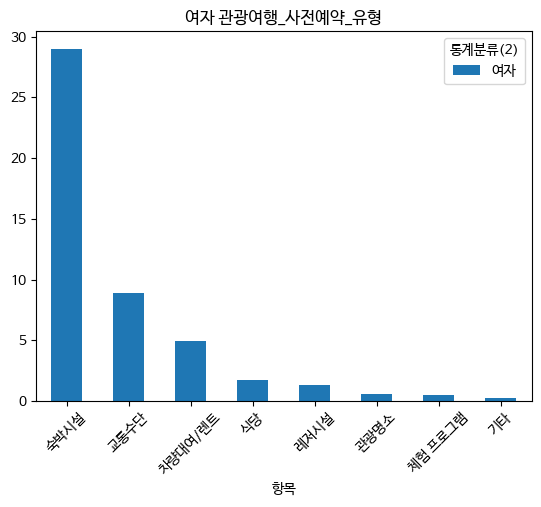

In [45]:
result.plot(kind='bar')
plt.title("여자 관광여행_사전예약_유형")
plt.xticks(rotation=45)
plt.show()

- 성별에 따른 차이가 별로 없음
- 교통수단과 차량대여의 경우 여성이 조금 많음 -> 남성이 여성보다 차를 많이 사나요?
- 레저시설은 남성이 조금 많음

In [ ]:
df_reservation_cate['시점'] = df_reservation_cate['시점'].astype(str)
year = df_reservation_cate.query("시점 == '2020' or 시점 == '2021' or 시점 == '2022'")
no_reservation = year.query("항목 == '관광명소' or 항목 == '교통수단' or 항목 == '기타' or 항목 == '레저시설' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램' or 항목 == '숙박시설'")
grouped = no_reservation.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

In [24]:
result.plot(kind='line')
plt.title("연도별 관광여행_사전예약_유형")
plt.xticks(rotation=0)
plt.show()

TypeError: no numeric data to plot